In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-notes-datasets/data1.csv
/kaggle/input/music-notes-datasets/dataset.csv
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s700.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s524.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s990.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s939.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s604.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s418.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s272.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s176.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s67.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s419.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s402.jpg
/kaggle/input/music-notes-datasets/datasets/dataset

In [4]:
import numpy as np # linear algebra
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [6]:
label_code = {'Eight':0,'Half':1,'Quarter':2,'Sixteenth':3,'Whole':4}
label_decode = ['Eight','Half','Quarter','Sixteenth','Whole']

In [7]:
df = pd.DataFrame(columns = ['path', 'label'])

In [8]:
for dirname, _, filenames in os.walk('../input/music-notes-datasets/datasets/datasets/Notes'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        name = dirname.split('/')[-1]
        label = label_code[name]
        df = df.append({'path' : path, 'label' : label}, ignore_index = True)

In [9]:
df.head()

,path,label
0,../input/music-notes-datasets/datasets/dataset...,3
1,../input/music-notes-datasets/datasets/dataset...,3
2,../input/music-notes-datasets/datasets/dataset...,3
3,../input/music-notes-datasets/datasets/dataset...,3
4,../input/music-notes-datasets/datasets/dataset...,3


In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state = 77)

In [11]:
train.head()

,path,label
336,../input/music-notes-datasets/datasets/dataset...,3
3473,../input/music-notes-datasets/datasets/dataset...,4
2900,../input/music-notes-datasets/datasets/dataset...,2
66,../input/music-notes-datasets/datasets/dataset...,3
1737,../input/music-notes-datasets/datasets/dataset...,0


In [12]:
test.head()

,path,label
4003,../input/music-notes-datasets/datasets/dataset...,1
2314,../input/music-notes-datasets/datasets/dataset...,2
3778,../input/music-notes-datasets/datasets/dataset...,4
100,../input/music-notes-datasets/datasets/dataset...,3
2968,../input/music-notes-datasets/datasets/dataset...,2


In [13]:
from tensorflow.keras.preprocessing.image import load_img

class dataloader(tf.keras.utils.Sequence):
       
    def __init__(self, batch_size, img_width, img_height, data):
        self.bs = batch_size
        self.h = img_height
        self.w = img_width
        self.path = data['path'].values
        self.label = data['label'].values
        
    def __len__(self):
        return len(self.path) // self.bs
    
    def __getitem__(self, idx):
        
        i = idx * self.bs
        batch_paths = self.path[i : i + self.bs]
        batch_labels = self.label[i : i + self.bs]
        
        X = np.zeros((self.bs, self.h, self.w, 3), dtype="float32")
        y = np.zeros((self.bs, 5), dtype="int32")
        
        for j in range(self.bs): 
            img = load_img(batch_paths[j], color_mode = "rgb", target_size=(self.h, self.w)) # color_mode = "grayscale" 
            img = np.array(img, dtype = 'float32') 
            img = 1-img/127.5
            X[j] = img     
            y[j,batch_labels[j]] = 1  
        return X, y

In [14]:
train_gen = dataloader(5, 224, 224, train)

test_gen = dataloader(5, 224, 224, test)

In [15]:
batch1 = test_gen[3]

images = batch1[0]

labels = batch1[1]

print("images in batch = ", images.shape)
print("labels in batch = ", labels.shape)

images in batch =  (5, 224, 224, 3)
labels in batch =  (5, 5)


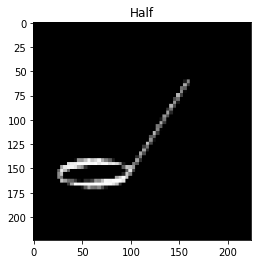

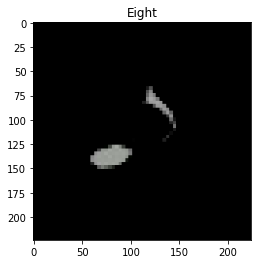

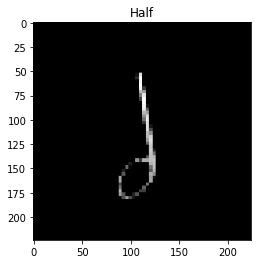

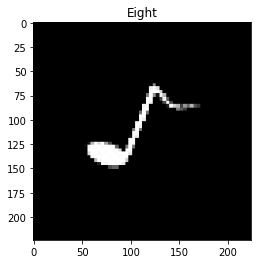

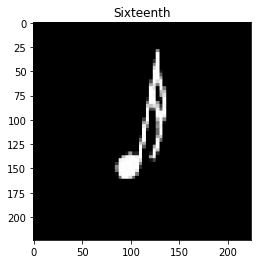

In [17]:
for i, j in zip(images, labels):
    plt.subplots()
    plt.imshow(i)
    plt.title(label_decode[np.argmax(j)])

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(4, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(4, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3), activation='relu'))
model.add(Conv2D(3, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5,activation='softmax'))

2022-03-09 13:31:13.841821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 13:31:13.938643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 13:31:13.939338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-09 13:31:13.940576: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 219, 219, 4)       516       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 4)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 107, 107, 4)       148       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 105, 105, 4)       148       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 103, 103, 3)       111       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 101, 101, 3)       8

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [22]:
model.fit(train_gen, epochs=30, validation_data=test_gen, verbose=1)

2022-03-09 13:33:05.955151: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-03-09 13:33:07.216498: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


800/800 [==============================] - 36s 37ms/step - loss: 0.8157 - accuracy: 0.6593 - val_loss: 0.3657 - val_accuracy: 0.8480
Epoch 2/30
800/800 [==============================] - 9s 11ms/step - loss: 0.2942 - accuracy: 0.8925 - val_loss: 0.2300 - val_accuracy: 0.9130
Epoch 3/30
800/800 [==============================] - 9s 12ms/step - loss: 0.1560 - accuracy: 0.9488 - val_loss: 0.1047 - val_accuracy: 0.9700
Epoch 4/30
800/800 [==============================] - 9s 11ms/step - loss: 0.1019 - accuracy: 0.9680 - val_loss: 0.0699 - val_accuracy: 0.9780
Epoch 5/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0537 - accuracy: 0.9847 - val_loss: 0.0518 - val_accuracy: 0.9770
Epoch 6/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 0.0852 - val_accuracy: 0.9760
Epoch 7/30
800/800 [==============================] - 10s 12ms/step - loss: 0.0245 - accuracy: 0.9940 - val_loss: 0.0542 - val_accuracy: 0.9880
Epoch 8/

In [25]:
path = '../input/music-notes-datasets/datasets/datasets/Notes/Quarter/q114.jpg'

img = load_img(path , color_mode = "rgb", target_size=(224, 224)) # (h ,w) color_mode = "grayscale" 
img = np.array(img, dtype = 'float32') 
img = 1-img/127.5

img = img.reshape(1,224,224,3)

y1 = model.predict(img)

In [26]:
s = np.argmax(y1)

print(label_decode[s])

Quarter
